## Getting Data

#### The following code query and clean the following data: <ln/>

=> BTC historical prices

In [2]:

import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import datetime

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



# Get today date
today_date = datetime.datetime.now().strftime('%Y-%m-%d')

In [3]:
# Getting price data of BTC using Cryptocompare API

# Indicate how many rows of data here
lim = '2000' 
crypto = ['BTC']
coins = pd.DataFrame()
# Making API call, normalize JSON file, and put it in Dataframe
for i in crypto:
    URL = 'https://min-api.cryptocompare.com/data/histohour?fsym='+i+'&tsym=USD&limit='+lim 
    data = requests.get(URL)
    json_data = data.json()
    table = json_normalize(json_data, 'Data').set_index('time') # Set index
    table.index = pd.to_datetime(table.index ,unit='s') # Make datetime object
    coins = pd.concat([coins, table.high], axis=1)
coins.columns = crypto

from_date = coins.index[0].strftime('%Y-%m-%d') # Get date where the query started

In [4]:
# Joining data frames
df = pd.concat([coins], axis=1).dropna(how='any')
df.to_csv('btc_historical_data.csv')
#df

In [5]:
# Feature Scaling

df_scaled = df.copy(deep=True)

sc_x = StandardScaler()
df_scaled['BTC'] = sc_x.fit_transform(df_scaled['BTC'].values.reshape(-1,1))

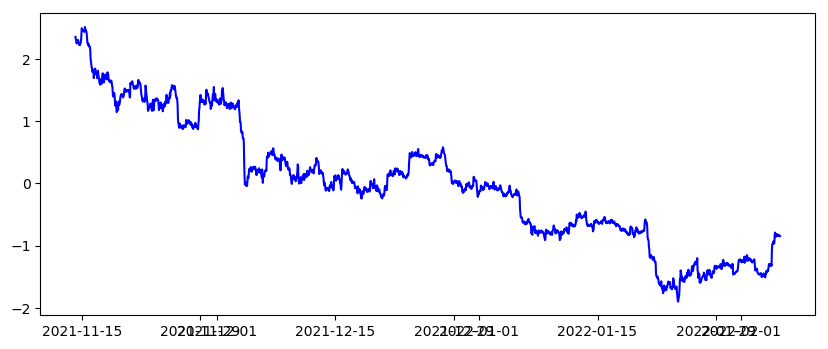

In [6]:
plt.figure(figsize=(10,4), dpi=100)
plt.plot(df_scaled.index, df_scaled['BTC'], color='blue')
plt.show()